# Regressão Linear - Predição da Idade

### importar bibliotecas

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### ler train.csv e test.csv

In [3]:
train = pd.read_csv('titanic/train.csv')

In [4]:
test = pd.read_csv('titanic/test.csv')

### transformar definir o Id do Passageiro como Index

In [5]:
train.set_index('PassengerId', inplace = True)


In [6]:
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.set_index('PassengerId', inplace=True)


In [8]:
test.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Verificar shape dos dois

In [9]:
train.shape, test.shape

((891, 11), (418, 10))

### Criar coluna "Survived" no test set

In [10]:
test['Survived'] = np.nan

### Conferir shape novamente

In [11]:
train.shape, test.shape

((891, 11), (418, 11))

### Concatenar train e test set

In [12]:
data = pd.concat([train, test], sort=False)


In [13]:
data.shape

(1309, 11)

### Traduzir colunas

In [14]:
data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [15]:
data.columns = ['Sobreviveu', 'Classe', 'Nome', 'Sexo', 'Idade', 
                'IrmaosConjuge', 'PaisFilhos', 'Bilhete','Tarifa', 'Cabine', 'Embarque']

### Traduzir Sexo

In [16]:
data['Sexo'] = data['Sexo'].map({'male': 'homem', 'female': 'mulher'})

In [17]:
data.head()

,Sobreviveu,Classe,Nome,Sexo,Idade,IrmaosConjuge,PaisFilhos,Bilhete,Tarifa,Cabine,Embarque
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",homem,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",mulher,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",mulher,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",mulher,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",homem,35.0,0,0,373450,8.0500,NaN,S


### Averiguar dados nulos

In [18]:
data.isnull().sum()

Sobreviveu        418
Classe              0
Nome                0
Sexo                0
Idade             263
IrmaosConjuge       0
PaisFilhos          0
Bilhete             0
Tarifa              1
Cabine           1014
Embarque            2
dtype: int64

### Remover Cabine

In [19]:
# remover a cabine, ja que nao tem relação com a predição da idade

data.drop('Cabine', axis=1, inplace=True)

### Checar dados nulos novamente

In [20]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           2
dtype: int64

### Preencher dados nulos de "Embarque" com a moda

In [21]:
data['Embarque'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [22]:
moda = data['Embarque'].mode()[0]

In [23]:
data['Embarque'].fillna(moda, inplace=True)

### Checar dados nulos novamente

In [24]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             1
Embarque           0
dtype: int64

### Preencher "Tarifa" faltando com a média

In [25]:
media = data['Tarifa'].mean()
media

33.29547928134557

In [26]:
data['Tarifa'].fillna(media, inplace=True)

### Checar dados nulos

In [27]:
data.isnull().sum()

Sobreviveu       418
Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

### Verificar correlações

In [28]:
data.corr()

C:\Users\Hian\AppData\Local\Temp\ipykernel_13808\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Sobreviveu,Classe,Idade,IrmaosConjuge,PaisFilhos,Tarifa
Sobreviveu,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Classe,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558477
Idade,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178229
IrmaosConjuge,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160224
PaisFilhos,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221522
Tarifa,0.257307,-0.558477,0.178229,0.160224,0.221522,1.000000


### Visualizar correlações com "heatmap"

C:\Users\Hian\AppData\Local\Temp\ipykernel_13808\1434830822.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), annot=True, cmap='OrRd')


<Axes: >

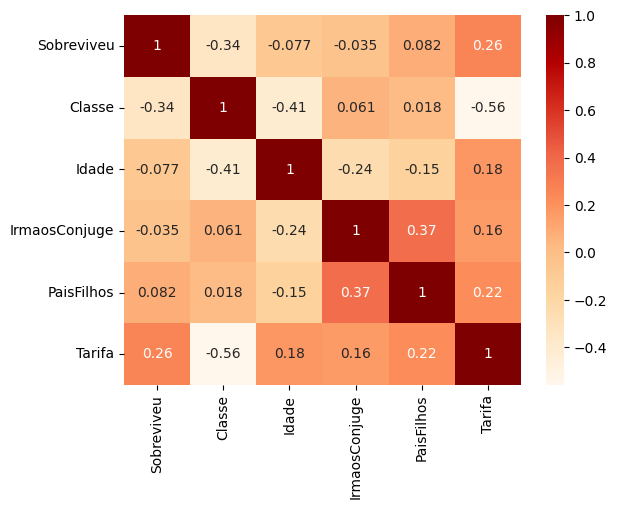

In [29]:
f, ax = plt.subplots(dpi=100)
sns.heatmap(data.corr(), annot=True, cmap='OrRd')

### Remover coluna "Sobreviveu"
Aparentemente não tem muita correlação com Idade, e está faltando bastante dados

In [30]:
data.drop('Sobreviveu', axis= 1, inplace=True)

### Checar dados nulos

In [31]:
data.isnull().sum()

Classe             0
Nome               0
Sexo               0
Idade            263
IrmaosConjuge      0
PaisFilhos         0
Bilhete            0
Tarifa             0
Embarque           0
dtype: int64

# Engenharia de Recursos I

### Criar coluna "Titulo" baseando-se na coluna "Nome"

In [32]:
data['Titulo'] = data['Nome'].str.extract('([a-zA-Z]+)\.')

In [33]:
data['Titulo'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer', 'Dona'], dtype=object)

In [34]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Capt,1,0
Col,4,0
Countess,0,1
Don,1,0
Dona,0,1
Dr,7,1
Jonkheer,1,0
Lady,0,1
Major,2,0


In [35]:
['Miss', 'Master', 'Mr', 'Mrs']

['Miss', 'Master', 'Mr', 'Mrs']

In [36]:
data['Titulo'] = data['Titulo'].apply(lambda x: 'Outros' if x not in ['Miss', 'Master', 'Mr', 'Mrs'] else x)

In [37]:
pd.crosstab(data['Titulo'], data['Sexo'])

Sexo,homem,mulher
Titulo,,
Master,61,0
Miss,0,260
Mr,757,0
Mrs,0,197
Outros,25,9


### Traduzir "Titulos"

In [38]:
titulos_traduzidos = {
    'Master': 'Menino', 
    'Miss': 'Solteira',
    'Mr': 'HomemAdulto',
    'Mrs': 'Casada'
}

In [39]:
data['Titulo'] = data['Titulo'].map(titulos_traduzidos)

### Averiguar informações do DataFrame

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Classe         1309 non-null   int64  
 1   Nome           1309 non-null   object 
 2   Sexo           1309 non-null   object 
 3   Idade          1046 non-null   float64
 4   IrmaosConjuge  1309 non-null   int64  
 5   PaisFilhos     1309 non-null   int64  
 6   Bilhete        1309 non-null   object 
 7   Tarifa         1309 non-null   float64
 8   Embarque       1309 non-null   object 
 9   Titulo         1275 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 112.5+ KB


### Remover "Bilhete" e "Nome"

In [41]:
data.drop(['Bilhete', 'Nome'], axis=1, inplace=True)

In [42]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto
2,1,mulher,38.0,1,0,71.2833,C,Casada
3,3,mulher,26.0,0,0,7.9250,S,Solteira
4,1,mulher,35.0,1,0,53.1000,S,Casada
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto


# Engenharia de Recursos II

### Estudar possibilidade de identificar "meninas" similar aos "meninos"
Através da combinação: "solteira" e está com "pais"

In [43]:
solteiras_com_pais = data.loc[(data['Titulo'] == 'Solteira') & (data['PaisFilhos']==1)]
solteiras_com_pais

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo
PassengerId,,,,,,,,
11,3,mulher,4.00,1,1,16.7000,S,Solteira
25,3,mulher,8.00,3,1,21.0750,S,Solteira
129,3,mulher,NaN,1,1,22.3583,C,Solteira
173,3,mulher,1.00,1,1,11.1333,S,Solteira
206,3,mulher,2.00,0,1,10.4625,S,Solteira
230,3,mulher,NaN,3,1,25.4667,S,Solteira
330,1,mulher,16.00,0,1,57.9792,C,Solteira
357,1,mulher,22.00,0,1,55.0000,S,Solteira
375,3,mulher,3.00,3,1,21.0750,S,Solteira


### idade média de "meninas solteiras acompanhadas dos pais"

In [44]:
solteiras_com_pais['Idade'].mean()

10.635135135135135

### verificar distribuição da idade

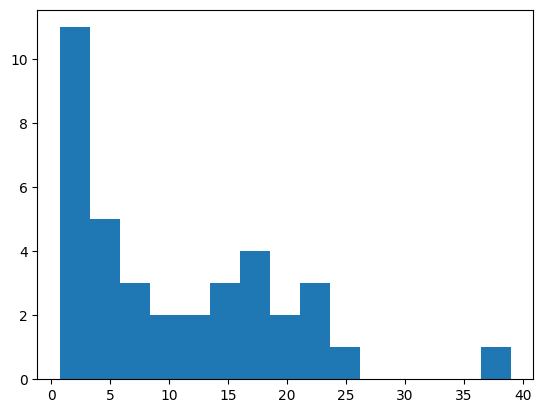

In [45]:
plt.hist(solteiras_com_pais['Idade'], bins=15)
plt.show()

### Média de mulheres "solteiras"

In [46]:
data.loc[data['Titulo'] == 'Solteira']['Idade'].mean()

21.774238095238097

### Distribuição das idades de mulheres "solteiras"

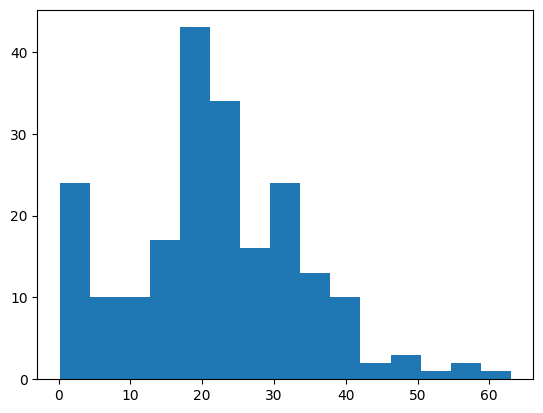

In [47]:
plt.hist(data.loc[data['Titulo'] == 'Solteira']['Idade'], bins=15)
plt.show()

### Média de idade de mulheres "casadas"

In [48]:
data.loc[data['Titulo'] == 'Casada']['Idade'].mean()

36.99411764705882

### Distribuição das idades de mulheres "casadas"

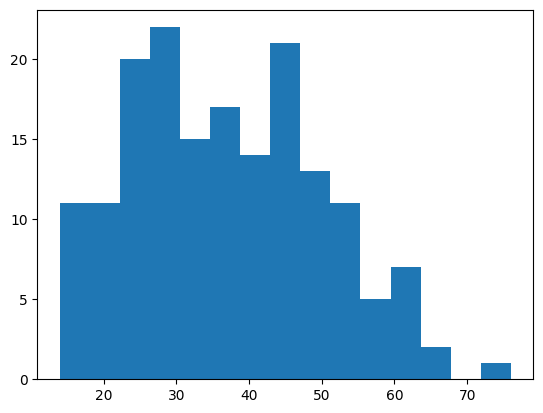

In [49]:
plt.hist(data.loc[data['Titulo'] == 'Casada']['Idade'], bins=15)
plt.show()

### Adicionar coluna "solteira com pais"

In [50]:
solteiras_com_pais.index

Int64Index([  11,   25,  129,  173,  206,  230,  330,  357,  375,  410,  447,
             449,  470,  480,  486,  531,  581,  619,  645,  652,  690,  692,
             703,  721,  751,  836,  853,  854,  918,  944, 1009, 1017, 1078,
            1095, 1130, 1155, 1175, 1176, 1218, 1294, 1301],
           dtype='int64', name='PassengerId')

In [51]:
data['solteira_com_pais'] = 0

In [52]:
for idx, _ in data.iterrows():
    if idx in solteiras_com_pais.index:
        data['solteira_com_pais'].at[idx] = 1

In [53]:
data.loc[data['solteira_com_pais']==1]['Idade'].mean()

#comparando com a média que a tinha feito mais acima, as médias se equiparam

10.635135135135135

In [54]:
data.loc[data['solteira_com_pais']==0]['Idade'].mean()

30.58688800792864

### Transformar recursos categóricos em "dummies"

In [55]:
data.head()

,Classe,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,Embarque,Titulo,solteira_com_pais
PassengerId,,,,,,,,,
1,3,homem,22.0,1,0,7.2500,S,HomemAdulto,0
2,1,mulher,38.0,1,0,71.2833,C,Casada,0
3,3,mulher,26.0,0,0,7.9250,S,Solteira,0
4,1,mulher,35.0,1,0,53.1000,S,Casada,0
5,3,homem,35.0,0,0,8.0500,S,HomemAdulto,0


### Transformação do sexo para binário

In [56]:
data['Sexo'] = data['Sexo'].map({'homem': 0, 'mulher': 1})

In [57]:
data = pd.get_dummies(data, columns=['Classe', 'Embarque', 'Titulo'], drop_first=True)

In [58]:
data.head()

,Sexo,Idade,IrmaosConjuge,PaisFilhos,Tarifa,solteira_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,,
1,0,22.0,1,0,7.2500,0,0,1,0,1,1,0,0
2,1,38.0,1,0,71.2833,0,0,0,0,0,0,0,0
3,1,26.0,0,0,7.9250,0,0,1,0,1,0,0,1
4,1,35.0,1,0,53.1000,0,0,0,0,1,0,0,0
5,0,35.0,0,0,8.0500,0,0,1,0,1,1,0,0


In [59]:
data.shape

(1309, 13)

### Separar train e test para idades
* treinar com dados não nulos
* aplicar modelo em dados nulos

In [60]:
data.isnull().sum()

Sexo                    0
Idade                 263
IrmaosConjuge           0
PaisFilhos              0
Tarifa                  0
solteira_com_pais       0
Classe_2                0
Classe_3                0
Embarque_Q              0
Embarque_S              0
Titulo_HomemAdulto      0
Titulo_Menino           0
Titulo_Solteira         0
dtype: int64

In [61]:
train_idade = data.dropna()

In [62]:
test_idade = data.loc[data['Idade'].isnull()].drop('Idade', axis=1)

In [63]:
test_idade

,Sexo,IrmaosConjuge,PaisFilhos,Tarifa,solteira_com_pais,Classe_2,Classe_3,Embarque_Q,Embarque_S,Titulo_HomemAdulto,Titulo_Menino,Titulo_Solteira
PassengerId,,,,,,,,,,,,
6,0,0,0,8.4583,0,0,1,1,0,1,0,0
18,0,0,0,13.0000,0,1,0,0,1,1,0,0
20,1,0,0,7.2250,0,0,1,0,0,0,0,0
27,0,0,0,7.2250,0,0,1,0,0,1,0,0
29,1,0,0,7.8792,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1300,1,0,0,7.7208,0,0,1,1,0,0,0,1
1302,1,0,0,7.7500,0,0,1,1,0,0,0,1
1305,0,0,0,8.0500,0,0,1,0,1,1,0,0


In [64]:
train_idade.shape, test_idade.shape

((1046, 13), (263, 12))

## Definir X e y para treinar o modelo

In [65]:
X = train_idade.drop('Idade', axis=1)

In [66]:
y = train_idade['Idade']

In [67]:
X.shape, y.shape

((1046, 12), (1046,))

### Importar modelo regressivo

In [68]:
from sklearn import linear_model

### Instanciar modelo

In [69]:
lm = linear_model.LinearRegression()

### Importar train_test_split para preparar para treino

In [70]:
from sklearn.model_selection import train_test_split

### Dividir 70% para treinar, 30% para testar

In [71]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=123)

### Treinar modelo

In [72]:
X_train.shape, y_train.shape

((700, 12), (700,))

In [73]:
X_test.shape, y_test.shape

((346, 12), (346,))

In [74]:
lm.fit(X_train, y_train)

LinearRegression()

### Fazer predição

In [75]:
#aqui já faz a predição com os dados de teste, baseado no treino que foi feito acima
pred = lm.predict(X_test)
pred.shape

(346,)

### Importar mean_squared_error (erro quadrado médio)

In [76]:
from sklearn.metrics import mean_squared_error

### Averiguar score

In [77]:
lm.score(X_test, y_test)

0.44284472841827893

### Averiguar rmse

In [78]:
mse = mean_squared_error(y_test, pred)

In [79]:
rmse = np.sqrt(mse)
rmse

10.850820219617534

### Visualizar resíduos em scatterplot

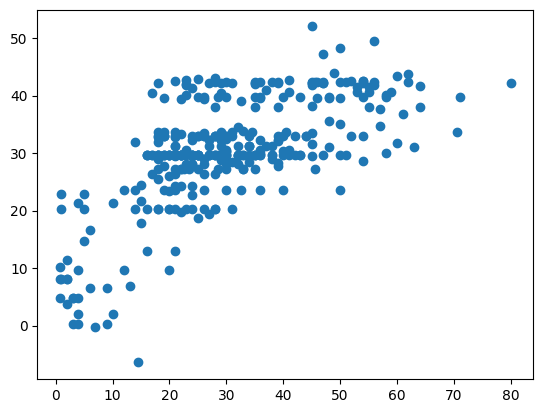

In [80]:
plt.scatter(y_test, pred)
plt.show()

<a name="tarifa"></a>

### Aplicar modelo nos dados nulos

In [81]:
test_idade.shape

(263, 12)

In [82]:
pred_idade = lm.predict(test_idade)

In [83]:
pred_idade.shape

(263,)

### Criar coluna Idade contendos as predições

In [84]:
test_idade['Idade'] = pred_idade

In [85]:
test_idade.isnull().sum()

Sexo                  0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
Idade                 0
dtype: int64

### Averiguar shapes

In [86]:
test_idade.shape, train_idade.shape

((263, 13), (1046, 13))

### Concatenar dados

In [87]:
idade = pd.concat([train_idade, test_idade], sort=False)

### Criar DataFrame contendo "IdPassageiro" e "Idade"

In [88]:
idade.isnull().sum()

Sexo                  0
Idade                 0
IrmaosConjuge         0
PaisFilhos            0
Tarifa                0
solteira_com_pais     0
Classe_2              0
Classe_3              0
Embarque_Q            0
Embarque_S            0
Titulo_HomemAdulto    0
Titulo_Menino         0
Titulo_Solteira       0
dtype: int64

In [89]:
idade.shape

(1309, 13)

In [90]:
idade_completa = pd.DataFrame({'IdPassageiro': idade.index, 'Idade': idade['Idade']})
idade_completa

,IdPassageiro,Idade
PassengerId,,
1,1,22.000000
2,2,38.000000
3,3,26.000000
4,4,35.000000
5,5,35.000000
...,...,...
1300,1300,24.217025
1302,1302,24.216918
1305,1305,29.720569


### Salvar CSV com idade completa

In [91]:
idade_completa.to_csv('idade_completa.csv', index=False)

In [92]:
data_idade = pd.read_csv('idade_completa.csv')

In [93]:
data_idade.head(20)

,IdPassageiro,Idade
0,1,22.0
1,2,38.0
2,3,26.0
3,4,35.0
4,5,35.0
5,7,54.0
6,8,2.0
7,9,27.0
8,10,14.0
9,11,4.0
